In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
from pysptk import sptk
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

# tf.compat.v1.enable_eager_execution()

In [5]:
sr = 22050

def get_speech(f, hop_size = 256):
    x, fs = malaya_speech.load(f, sr = sr)
    wav = x
    mel = malaya_speech.featurization.universal_mel(wav)
    
    batch_max_steps = random.randint(22050, 154350)
    batch_max_frames = batch_max_steps // hop_size
    
    if len(mel) > batch_max_frames:
        interval_start = 0
        interval_end = len(mel) - batch_max_frames
        start_frame = random.randint(interval_start, interval_end)
        start_step = start_frame * hop_size
        mel = mel[start_frame : start_frame + batch_max_frames, :]

    return mel

In [6]:
mel = get_speech('../speech/example-speaker/female.wav')
mel_1 = get_speech('../speech/example-speaker/khalil-nooh.wav')
mel_2 = get_speech('../speech/44k/test-2.wav')

In [7]:
mels, mel_lens = malaya_speech.padding.sequence_nd([mel, mel_1, mel_2], dim = 0, return_len = True)
mels.shape, mel_lens

((3, 208, 80), [206, 91, 208])

In [8]:
X = tf.placeholder(tf.float32, [None, None, 80])
X_f0 = tf.placeholder(tf.float32, [None, None, 1])
len_X = tf.placeholder(tf.int32, [None])
V = tf.placeholder(tf.float32, [None, 512])

In [9]:
from malaya_speech.train.model import speechsplit, fastspeechsplit, fastspeech






The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [15]:
hparams = speechsplit.hparams
interplnr = speechsplit.InterpLnr(hparams)

In [16]:
x_intrp = interplnr(X, len_X)

In [12]:
sess = tf.Session()

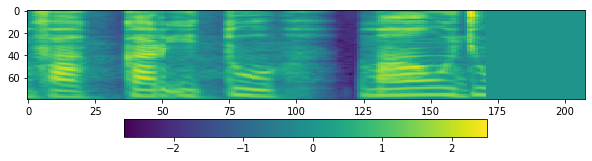

In [21]:
o = sess.run(x_intrp, feed_dict = {X: mels, len_X: mel_lens})[0]
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
im = ax1.imshow(np.rot90(o), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

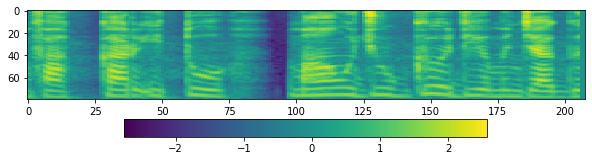

In [23]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
im = ax1.imshow(np.rot90(mels[0]), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()